In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv(r'C:\Users\venxr\Udacity_exercises\AIPND-master\Matplotlib\data\fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


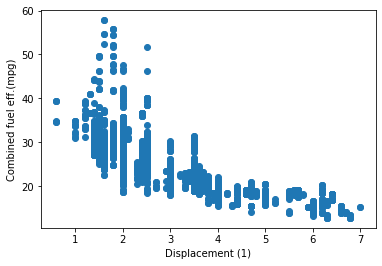

In [3]:
plt.scatter(data = fuel_econ, x = 'displ', y ='comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined fuel eff.(mpg)');

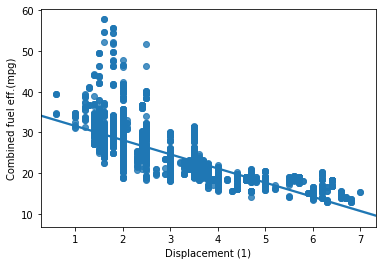

In [4]:
sb.regplot(data = fuel_econ, x = 'displ', y ='comb');
plt.xlabel('Displacement (1)')
plt.ylabel('Combined fuel eff.(mpg)');

([<matplotlib.axis.YTick at 0x195c096e0b8>,
 <a list of 6 Text yticklabel objects>)

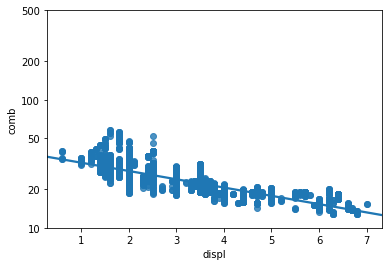

In [5]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(fuel_econ['displ'], fuel_econ['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs)

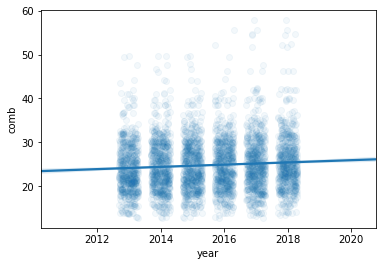

In [6]:
sb.regplot(data = fuel_econ, x = 'year', y ='comb', x_jitter = 0.3, scatter_kws = {'alpha':1/20});

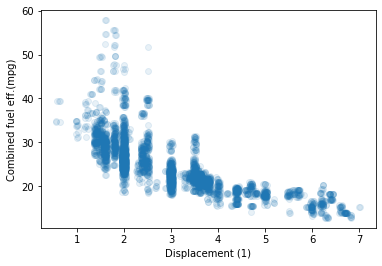

In [7]:
#Heat maps

sb.regplot(data = fuel_econ, x = 'displ', y ='comb', x_jitter = 0.04, scatter_kws = {'alpha':1/10}, fit_reg = False);
plt.xlabel('Displacement (1)')
plt.ylabel('Combined fuel eff.(mpg)');

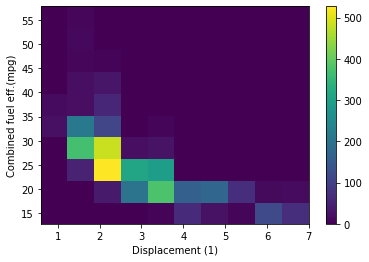

In [8]:
plt.hist2d(data = fuel_econ, x = 'displ', y ='comb');
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined fuel eff.(mpg)');

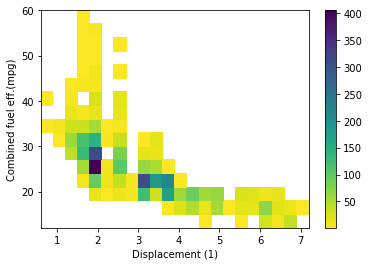

In [9]:
bins_x = np.arange(0.6,7+0.3,0.3)
bins_y =np.arange(12, 58+3,3)
plt.hist2d(data = fuel_econ, x = 'displ', y ='comb',cmin = 0.5, cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined fuel eff.(mpg)');

In [10]:
fuel_econ[['displ','comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


In [11]:
#Comparing categorical or qualitative variable with quantitative variable use violin plots

In [12]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [13]:
fuel_econ

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6
6,32210,Lexus,GS 350 AWD,2013,Midsize Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,18.5752,23.5261,26.3573,36.2109,21.4213,412,5,5
7,32214,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,4,2.0,89,0,17.4460,21.7946,26.6295,37.6731,20.6507,432,5,5
8,32215,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Manual 6-spd,Premium Gasoline,4,2.0,89,0,20.6741,26.2000,29.2741,41.8000,23.8235,375,6,6
9,32216,Hyundai,Genesis Coupe,2013,Subcompact Cars,Rear-Wheel Drive,Automatic 8-spd,Premium Gasoline,6,3.8,89,0,16.4675,20.4839,24.5605,34.4972,19.3344,461,4,4


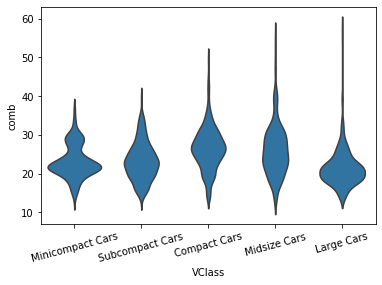

In [15]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, inner = None);
plt.xticks(rotation = 15);

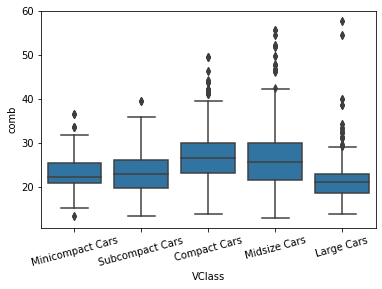

In [17]:
#Box plots
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color);
plt.xticks(rotation = 15);

In [22]:
#Clustered bar chart

fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])

In [26]:
sb.heatmap(ct_counts);

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [23]:
ct_counts  = fuel_econ.groupby(['VClass','trans_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


In [25]:
sb.heatmap(ct_counts, annot = True, fmt = 'd');

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

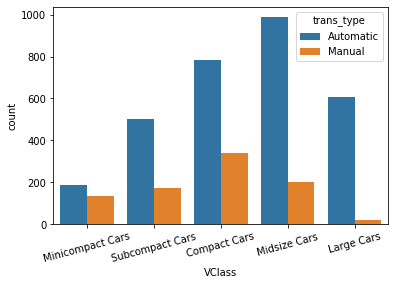

In [27]:
sb.countplot(data = fuel_econ, x ='VClass', hue = 'trans_type')
plt.xticks(rotation = 15);

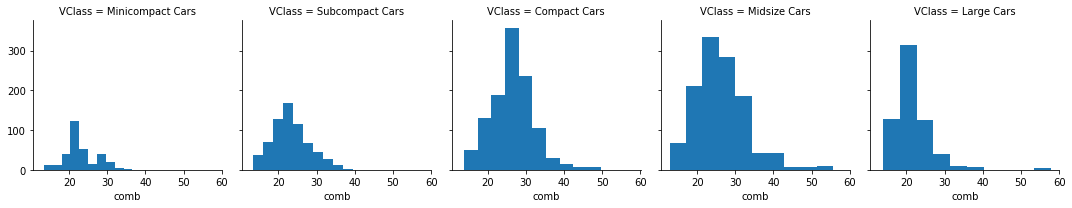

In [28]:
bins = np.arange(12,58+2,2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3, sharey = False);
g.map(plt.hist, 'comb', bins =bins);

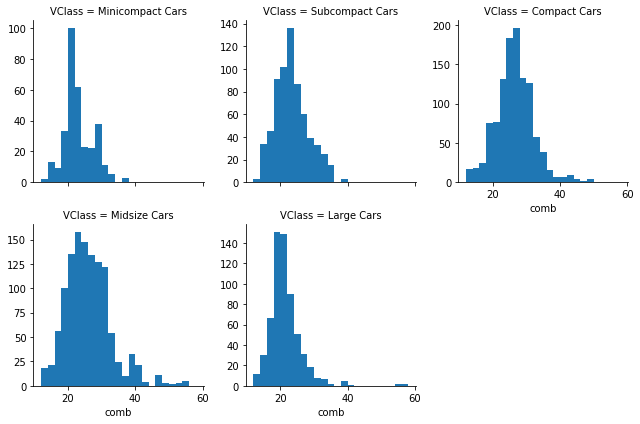

In [29]:
bins = np.arange(12,58+2,2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3, sharey = False);
g.map(plt.hist, 'comb', bins =bins);

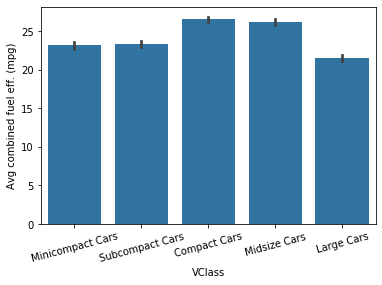

In [30]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color);
plt.xticks(rotation = 15);
plt.ylabel('Avg combined fuel eff. (mpg)');